# SETUP

In this project, we explore two widely studied sorting algorithms: Merge Sort and Heap Sort. While Merge Sort is a classic example of the divide-and-conquer approach, Heap Sort follows a distinct methodology using a heap data structure. Both algorithms have their mathematical representations, which allow us to analyze their key characteristics, especially their efficiency.

Efficiency is a crucial metric when evaluating sorting algorithms, as different methods may perform better depending on the size and nature of the input data. In this study, we aim to demonstrate the performance of these algorithms by applying them to randomly generated lists of various sizes. By doing so, we can evaluate their behavior under different conditions and ensure that our results are robust through a sufficiently large sample size.

The project is divided into two parts: the implementation of the algorithms in Python, structured as a class, and a Jupyter notebook that runs experiments using these implementations. This setup allows us to systematically compare the performance of Merge Sort and Heap Sort and provide insights into their practical applications.

**System Configuration for Experiments:**

- **Processor:** Intel(R) Core(TM) i7-4900MQ CPU @ 2.80GHz  
  - 8 CPUs (4 cores per socket, hyper-threading enabled)  
  - Maximum frequency: 3.8 GHz

- **Memory (RAM):** 15 GB total  
  - Approximately 5.1 GB used  
  - 9.6 GB available at the time of testing

- **Operating System:** Ubuntu 22.04.5 LTS (Jammy)

The **Heap Sort** algorithm has a time complexity of \( O(n \log n) \), a characteristic it shares with the **Merge Sort** algorithm. This relatively efficient runtime makes both algorithms suitable for large datasets. However, to evaluate their actual performance in practice, we will need to implement certain foundational functions.

### Heap Sort Implementation:
- The first step in the heap sort process is establishing the **max heap** property in the given sequence \( A \). To achieve this, we use the function `Build-Max-Heap`.
- The function `Max-Heapify` ensures that the **max heap** property is maintained by reorganizing elements when needed.

### Merge Sort Implementation:
- The `Merge` function handles the merging of subsequences, ensuring that they are combined in the correct order.
- The `sort1` method utilizes the `Merge` function to recursively sort and merge the entire dataset.


All the necessary code is stored in the form of classes in the python file Algo_prgFunc. We are going to import it and use it in our notebook as a library.

In [1]:
from Algo_prgFunc import * 

We have The necessary functions to implement the _**Merge_sort**_ algorithm and now we shall create some random sets to test the performance of the two algorithms.
The sequences are going to have different sizes of [100, 200, 400, 800, 1600, 3200, 6400] so we can compare the running time for each sets length.
The random sets will be produced by the function get_random_seq of the Set_creation class of the Algo_prgFunc.py.The function uses the library _random_ to chose elements from a uniform distribution of the numbers inside the boundaries of a given range.

In [2]:
len_sequences = [ 100, 200, 400, 800, 1600, 3200, 6400 ]
value_range = [1,10**5]

Sequences = Set_creation(value_range).get_multiple_random_seq(len_sequences) 

With the code below, we have generated scatter plots for the random sets we created. We could use the same process of scatter plotting to create a video that demonstrates the effects of the Merge Sort algorithm on our random dataset over time. It's interesting to note that if a plot-frame is generated each time the algorithm makes a change to the working set, the number of plot frames created is directly proportional to the steps of the sorting method. The same applies to the final viewing time of the video.


We olso used the code below to create 2 graphs of our random set-sizes. Those can be found in the file **Figures** of the main repository.

<Figure size 200x1600 with 0 Axes>

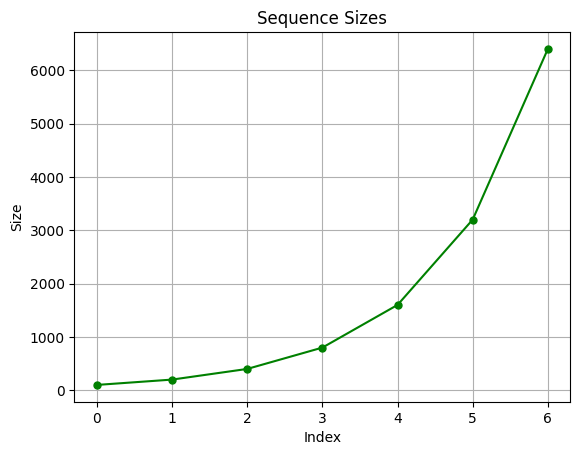

In [4]:
log_sizes = [np.log(size) for size in len_sequences]

df_sizes = pd.DataFrame(len_sequences, columns=['Sizes'])
plot1_legend = ""
plt.figure(figsize=(2, 16))  # Set the figure size here
plt_sizes = df_sizes.plot(legend=plot1_legend, marker='o', linestyle='-', color='g', markersize=5)
plt.xlabel('Index')
plt.ylabel('Size')
plt.title('Sequence Sizes')
plt.grid()
plt.show()

### Parameters of Merge Sort

In the context of the Merge Sort algorithm, the parameters have specific meanings:

- **A**: This parameter represents the array or list that you want to sort. It contains the elements that need to be sorted.

- **p**: The `p` parameter represents the starting index of the subarray you want to sort. It is the index of the first element of the subarray within the larger array `A`. In the typical use of Merge Sort, `p` is initialized to 0 to indicate the beginning of the array.

- **r**: The `r` parameter represents the ending index of the subarray you want to sort. It is the index of the last element of the subarray within the larger array `A`. In the typical use of Merge Sort, `r` is initialized to the index of the last element in the array, which is usually `len(A) - 1`.

These values ensure that you are sorting the entire array `A` from the first element to the last, which is the standard application of the Merge Sort algorithm.


In the following cell, we are testing the running time of the Merge Sort algorithm for various sizes of randomly generated sequences. To minimize the impact of randomness on the results, we will average the execution times over a small number of generated sequences for each size. As shown in the resulting graphs, the performance times may vary slightly due to the inherent randomness of the sequences. However, we observe a clear trend where the execution time consistently follows the expected growth pattern, as predicted by the algorithm's time complexity, 
𝑂
(
𝑛
log
⁡
𝑛
)
.

[0.000568389892578125, 0.0016372203826904297, 0.0036978721618652344, 0.007272005081176758, 0.0068628787994384766, 0.016753196716308594, 0.030560970306396484]
[0.0004885196685791016, 0.0009517669677734375, 0.0020720958709716797, 0.004737377166748047, 0.007247447967529297, 0.015108823776245117, 0.02667093276977539]
[0.0003345012664794922, 0.0005457401275634766, 0.0014488697052001953, 0.0025186538696289062, 0.005605220794677734, 0.01153707504272461, 0.024825334548950195]
[0.0002722740173339844, 0.0005154609680175781, 0.001178741455078125, 0.002696990966796875, 0.006056308746337891, 0.01176595687866211, 0.026548385620117188]
[0.0002887248992919922, 0.0006093978881835938, 0.0014472007751464844, 0.0028014183044433594, 0.0060346126556396484, 0.011623859405517578, 0.02522110939025879]


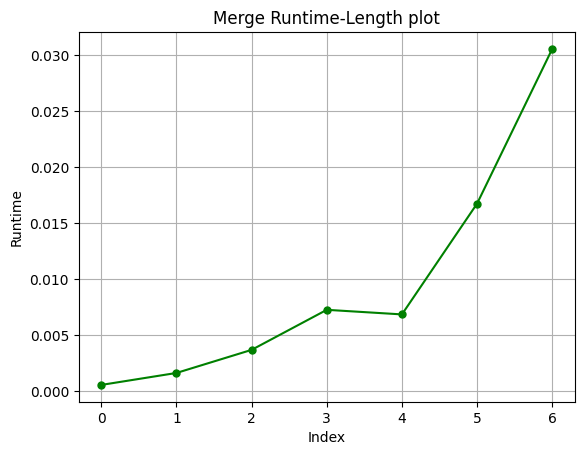

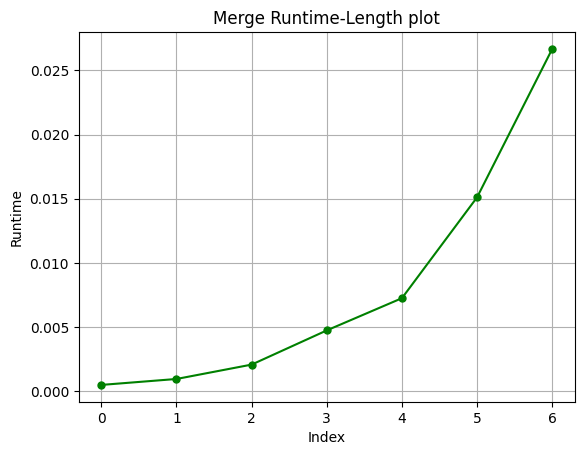

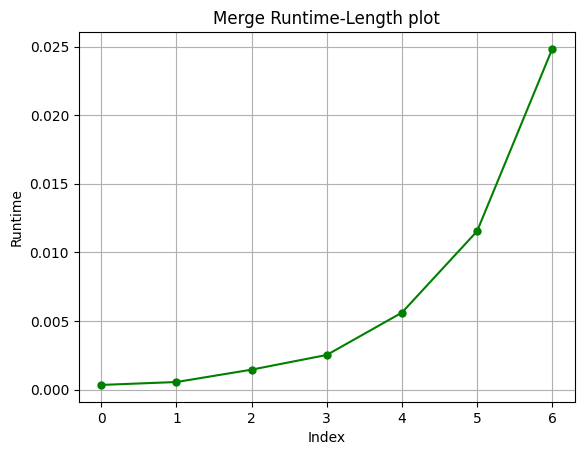

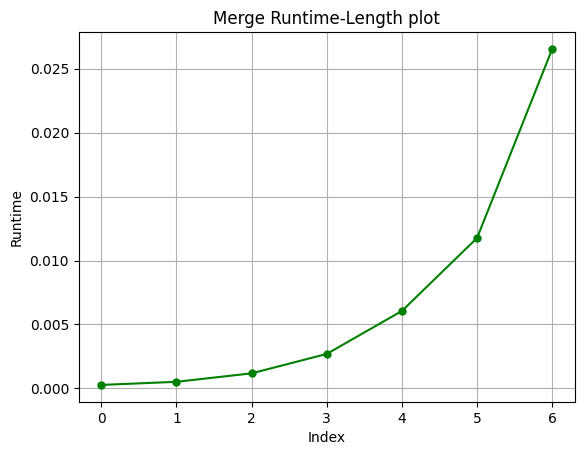

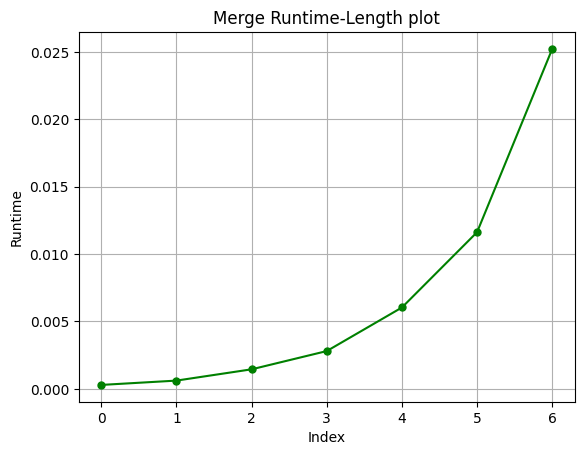

In [54]:
def Experiment(Algorithm, Sequences):
    # Use the Merge _sort algorithm 
    Times = []
    Sorted_sequences = []

    for index, seq in enumerate(Sequences):
        ALgorithm_isinstance = Algorithm(seq)
        runtime = ALgorithm_isinstance["recorted_time"] 
        Sorted_sequence = ALgorithm_isinstance["sorted_data"] 
        Times.append(runtime)
        # print(Sorted_sequence)
        Sorted_sequences.append(Sorted_sequence)    

    print(Times) 
    Times_df = pd.DataFrame({"Times":Times})
    plt_times = Times_df.plot(legend=plot1_legend, marker='o', linestyle='-', color='g', markersize=5)
    plt.title('Merge Runtime-Length plot')
    plt.xlabel('Index')
    plt.ylabel('Runtime')
    plt.grid()
    return Sorted_sequences

for i in range(5):
    sorted_seqences = Experiment(Mergesort, Sequences) 

The Merge Sort algorithm has a consistent time complexity of 
𝑂
(
𝑛
log
⁡
𝑛
)
O(nlogn) for all input types, including sorted, reverse sorted, or completely random sequences.

This is because Merge Sort's behavior depends on how the array is recursively divided and merged, not on the initial ordering of the elements. The algorithm always divides the array into subarrays, sorts them, and then merges them back together. Since this process happens in a fixed manner regardless of the input order, the time complexity remains the same.

Let us confirm that using our library to sort the reversed sorted sequences. We are going to reverse a sorted sequence from the previous step.

7
[0.0003941059112548828, 0.0007886886596679688, 0.0021550655364990234, 0.005414247512817383, 0.009391307830810547, 0.01982903480529785, 0.04642677307128906]


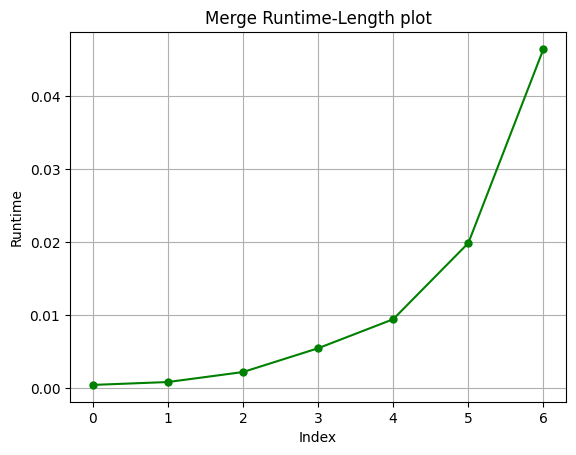

In [53]:
reverse_sequences = [seq[::-1] for seq in sorted_seqences] 
print(len(reverse_sequences))
reverse_sorted = Experiment(Mergesort, reverse_sequences) 

As we can see the results are pretty much the same!!

Here we defining the function that is responsibol for maintaining the max-heap propertie in the sequense A.
### Parameters of Heap Sort

In the context of the Heap Sort algorithm, the parameters have specific meanings:

- **A**: This parameter represents the array or list that you want to sort. It contains the elements that need to be sorted using the Heap Sort algorithm.

- **i**: The `i` parameter represents the index of the current element within the heap. It is used to traverse the elements in the heap data structure during the sorting process.

- **n**: The `n` parameter represents the total number of elements in the array. It signifies the size of the heap and helps in controlling the sorting process within the specified range.

These values are essential for Heap Sort to organize and sort the elements efficiently within the provided array. The `i` and `n` parameters play a crucial role in navigating and maintaining the heap structure, while the `A` parameter holds the elements to be sorted.


Let us use the same random sequences generated earlyer to run the same experiments with the heap sort algorithm.

[0.0006229877471923828, 0.0012388229370117188, 0.0032498836517333984, 0.00617527961730957, 0.014292716979980469, 0.035422325134277344, 0.0883936882019043]
[0.0005476474761962891, 0.0010254383087158203, 0.0021789073944091797, 0.004945278167724609, 0.011359930038452148, 0.025125980377197266, 0.054991960525512695]
[0.0004622936248779297, 0.0010111331939697266, 0.002184629440307617, 0.005025386810302734, 0.010759115219116211, 0.024224281311035156, 0.06328034400939941]
[0.0004947185516357422, 0.0009636878967285156, 0.0026035308837890625, 0.005379676818847656, 0.012766838073730469, 0.026801109313964844, 0.06300878524780273]
[0.0004513263702392578, 0.0010387897491455078, 0.002336740493774414, 0.004926204681396484, 0.0129547119140625, 0.025186777114868164, 0.06437063217163086]


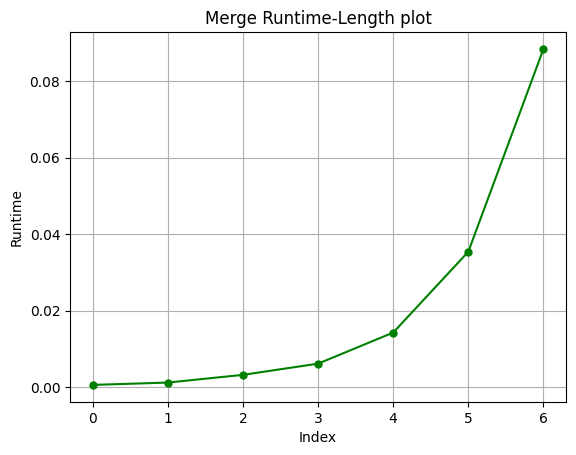

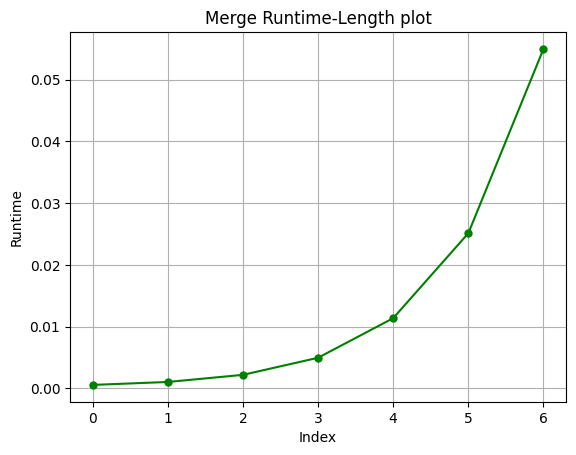

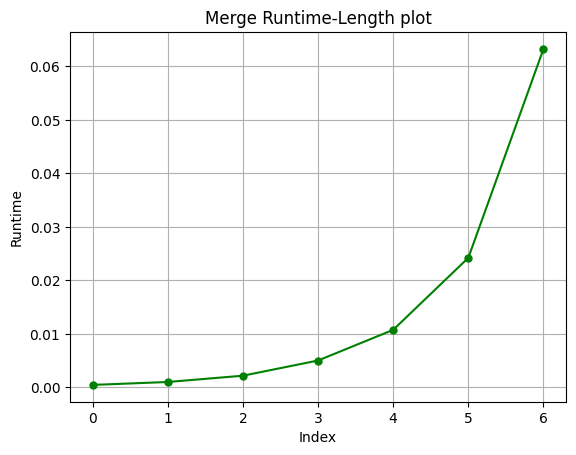

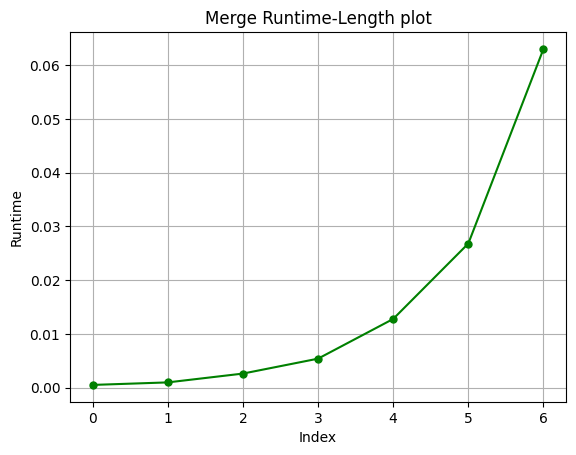

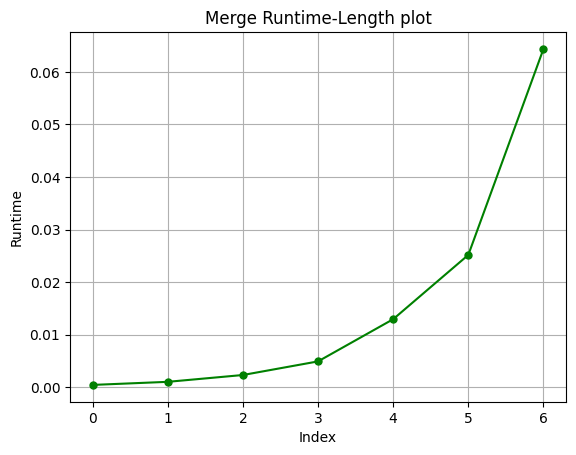

In [55]:
for i in range(5):
    sorted_seqences = Experiment(Heapsort, Sequences) 

In our experiments, we tested the running time of the Merge Sort algorithm on various randomly generated sequences. As we analyzed the runtime results, it became clear that the Merge Sort algorithm consistently adhered to its theoretical time complexity of 
𝑂
(
𝑛
log
⁡
𝑛
)
O(nlogn). The recorded runtimes demonstrated a predictable pattern, showing a logarithmic growth relative to the size of the input sequences.

The graph produced from our experimental data illustrates this relationship effectively, with the execution times plotted against the indices of the sequences. Each point on the graph represents the runtime for a specific sequence, and while there are slight variations in the execution times due to external factors such as system load and memory access patterns, the overall trend remains evident.

Additionally, it is worth noting that the performance of the Merge Sort algorithm remained stable even when the input sequences were in reverse order, highlighting its efficiency across different arrangements. This robustness reinforces the suitability of Merge Sort for a wide range of sorting tasks, regardless of the initial order of the data.